<a href="https://colab.research.google.com/github/namitasathish/FurFriend-Detector/blob/main/FurFriend_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Extracting dataset using Kaggle API


In [1]:
!pip install kaggle


In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing dog cat dataset from kaggle

In [10]:
!kaggle competitions download -c dogs-vs-cats

 99% 806M/812M [00:07<00:00, 99.0MB/s]
100% 812M/812M [00:07<00:00, 113MB/s] 


In [11]:
!ls


dogs-vs-cats.zip  kaggle.json  sample_data


In [12]:
#extracting dogs cats
from zipfile import ZipFile
dataset='/content/dogs-vs-cats.zip'

with ZipFile(dataset , 'r') as zip:
  zip.extractall()
  print('Extracted')

Extracted


In [13]:
#extracting train dataset
from zipfile import ZipFile
dataset='/content/train.zip'

with ZipFile(dataset , 'r') as zip:
  zip.extractall()
  print('Extracted')

Extracted


In [14]:
import os
#counting files in train dataset
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("number of images:",file_count)


number of images: 25000


Printing the name of images


In [15]:
file_names=os.listdir('/content/train')
print(file_names)

['cat.6435.jpg', 'cat.1938.jpg', 'dog.8965.jpg', 'cat.1979.jpg', 'cat.4442.jpg', 'dog.3333.jpg', 'cat.11539.jpg', 'cat.7346.jpg', 'cat.9806.jpg', 'cat.1542.jpg', 'dog.706.jpg', 'dog.11469.jpg', 'cat.7279.jpg', 'dog.4874.jpg', 'dog.1295.jpg', 'dog.11527.jpg', 'cat.382.jpg', 'cat.12447.jpg', 'cat.12108.jpg', 'dog.8221.jpg', 'dog.6015.jpg', 'dog.9544.jpg', 'dog.4448.jpg', 'dog.3086.jpg', 'cat.12145.jpg', 'dog.9763.jpg', 'cat.7725.jpg', 'dog.1224.jpg', 'dog.5870.jpg', 'cat.5296.jpg', 'dog.5204.jpg', 'cat.7630.jpg', 'dog.9744.jpg', 'cat.6114.jpg', 'cat.376.jpg', 'cat.9376.jpg', 'cat.872.jpg', 'cat.3666.jpg', 'cat.3588.jpg', 'cat.8040.jpg', 'cat.11391.jpg', 'cat.7813.jpg', 'dog.1983.jpg', 'cat.311.jpg', 'dog.7802.jpg', 'dog.4825.jpg', 'dog.10680.jpg', 'dog.206.jpg', 'dog.9846.jpg', 'cat.7126.jpg', 'cat.11809.jpg', 'cat.10434.jpg', 'dog.672.jpg', 'cat.6522.jpg', 'dog.5717.jpg', 'dog.9948.jpg', 'cat.7647.jpg', 'dog.6262.jpg', 'cat.10670.jpg', 'dog.5766.jpg', 'dog.10128.jpg', 'dog.1587.jpg', 'd

Importing dependencies

In [17]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying images of dogs and cats


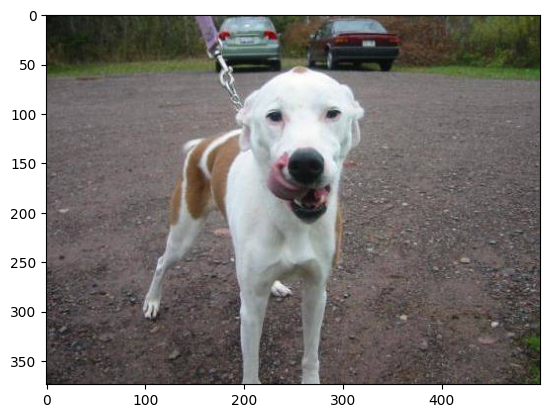

In [20]:
#display dog
img=mpimg.imread('/content/train/dog.8965.jpg')
imgplt=plt.imshow(img)
plt.show()

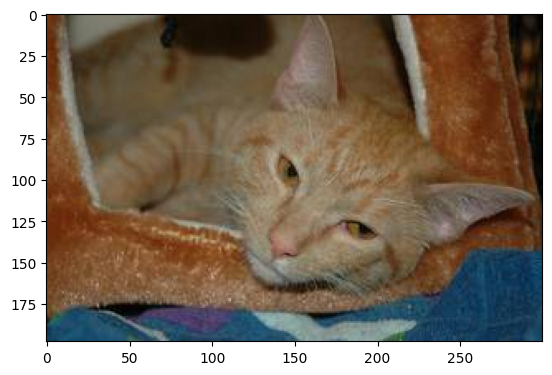

In [24]:
#display cat
img=mpimg.imread('/content/train/cat.6435.jpg')
imgplt=plt.imshow(img)
plt.show()

counting the number of dog and cat images

In [25]:

file_names=os.listdir('/content/train')

dog_count=0
cat_count=0
for img_file in file_names:
  name=img_file[0:3]
  if name=='dog':
    dog_count+=1
  elif name=='cat':
    cat_count+=1
print("dogcount:",dog_count)
print("catcount:",cat_count)

dogcount: 12500
catcount: 12500


#Resizing and Labeling images

In [26]:
#new directory for resized images

os.mkdir('/content/image resized')

In [29]:
original_folder='/content/train/'
resized_folder='/content/image resized/'

for i in range(2000):
  filename=os.listdir(original_folder)[i]
  img_path=original_folder+filename

  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')
  newImgPath=resized_folder+filename
  img.save(newImgPath)


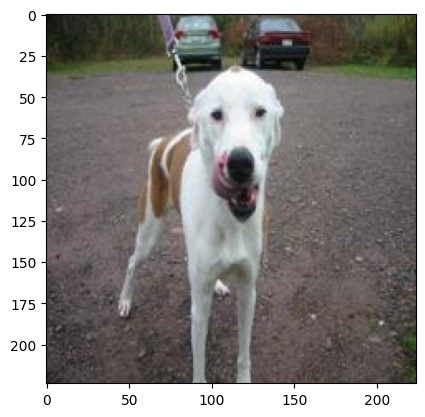

In [30]:
#display resized  dog
img=mpimg.imread('/content/image resized/dog.8965.jpg')
imgplt=plt.imshow(img)
plt.show()

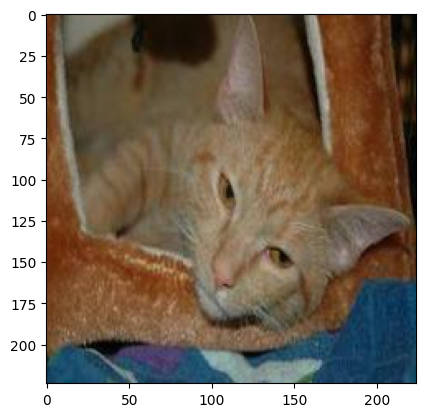

In [31]:
#display resized cat
img=mpimg.imread('/content/image resized/cat.6435.jpg')
imgplt=plt.imshow(img)
plt.show()

Labeling images



*   cat--->0
*   dog--->1




In [32]:
filenames=os.listdir('/content/image resized/')
labels=[]

for i in range(2000):
  file_name=filenames[i]
  label=file_name[0:3]
  if label=='cat':
    labels.append(0)
  elif label=='dog':
    labels.append(1)


In [34]:
print(filenames[0:5])
print(len(filenames))

['cat.6435.jpg', 'cat.1938.jpg', 'dog.8965.jpg', 'cat.1979.jpg', 'cat.4442.jpg']
2000


In [35]:
print(labels[0:5])
print(len(labels))

[0, 0, 1, 0, 0]
2000


Counting dog and cat images in resized images

In [36]:
values, counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[1040  960]


#Converting Images to numpy arrays

In [37]:
import cv2
import glob

In [39]:
image_directory='/content/image resized/'
image_extension=['png','jpg']

files=[]
[files.extend(glob.glob(image_directory+'*.'+e)) for e in image_extension]
dog_cat_images=np.asarray([cv2.imread(file) for file in files])

In [40]:
print(dog_cat_images)

[[[[ 40  77 133]
   [ 27  63 117]
   [ 16  50 103]
   ...
   [  5  12  15]
   [  3   8   6]
   [  1   5   0]]

  [[ 35  72 128]
   [ 25  61 115]
   [ 16  50 103]
   ...
   [  6  13  16]
   [  3   8   6]
   [  0   4   0]]

  [[ 29  64 120]
   [ 22  58 112]
   [ 18  52 105]
   ...
   [  6  13  16]
   [  3   8   6]
   [  0   4   0]]

  ...

  [[ 97  68  24]
   [ 97  68  23]
   [ 98  69  24]
   ...
   [104  78  24]
   [101  76  20]
   [ 97  72  16]]

  [[ 94  66  25]
   [ 94  67  23]
   [ 93  66  22]
   ...
   [107  81  27]
   [103  78  22]
   [ 98  74  16]]

  [[ 89  61  20]
   [ 89  61  20]
   [ 89  62  18]
   ...
   [108  83  27]
   [103  78  22]
   [ 99  75  17]]]


 [[[253 255 254]
   [250 253 251]
   [249 251 252]
   ...
   [249 252 250]
   [255 254 253]
   [255 255 254]]

  [[246 248 248]
   [241 243 243]
   [239 241 242]
   ...
   [236 239 237]
   [243 241 240]
   [252 250 249]]

  [[240 242 243]
   [233 235 236]
   [227 229 230]
   ...
   [220 222 222]
   [232 230 230]
   [249 247

In [41]:
type(dog_cat_images)

numpy.ndarray

In [42]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


#Train test split

In [43]:
x=dog_cat_images
y=np.asarray(labels)


In [44]:
xtrain,xtest, ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

print(x.shape, xtrain.shape, xtest.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


Scaling the data

In [45]:
xtrain_scaled=xtrain/255
xtest_scaled=xtest/255

In [46]:
print(xtrain_scaled)


[[[[0.39215686 0.36078431 0.38823529]
   [0.39215686 0.36078431 0.38823529]
   [0.39607843 0.36470588 0.39215686]
   ...
   [0.91764706 0.84705882 0.80392157]
   [0.95294118 0.87843137 0.82745098]
   [0.97647059 0.90196078 0.85098039]]

  [[0.39215686 0.36078431 0.38823529]
   [0.39215686 0.36078431 0.38823529]
   [0.39215686 0.36078431 0.38823529]
   ...
   [0.92156863 0.85098039 0.80784314]
   [0.97254902 0.89803922 0.84705882]
   [1.         0.93333333 0.88235294]]

  [[0.38823529 0.35686275 0.38431373]
   [0.38823529 0.35686275 0.38431373]
   [0.39215686 0.36078431 0.38823529]
   ...
   [0.93333333 0.8627451  0.81960784]
   [0.99607843 0.92941176 0.87843137]
   [1.         0.97254902 0.92156863]]

  ...

  [[0.17254902 0.28235294 0.41568627]
   [0.17647059 0.28627451 0.41960784]
   [0.20392157 0.31372549 0.44705882]
   ...
   [0.25098039 0.27058824 0.32941176]
   [0.24313725 0.2627451  0.32156863]
   [0.23921569 0.25882353 0.31764706]]

  [[0.11764706 0.21960784 0.36078431]
   [0.1

#Building the Neural network

In [47]:
import tensorflow as tf
import tensorflow_hub as hub


In [48]:
mobilenet_model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

prtrainedmodel=hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)

In [49]:
num_of_classes=2
model=tf.keras.Sequential([
    prtrainedmodel,
    tf.keras.layers.Dense(num_of_classes)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [50]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc'])

In [51]:
model.fit(xtrain_scaled,ytrain,epochs=5)

Epoch 1/5
50/50 [==============================] - 83s 2s/step - loss: 0.1902 - acc: 0.9262
Epoch 2/5
50/50 [==============================] - 65s 1s/step - loss: 0.0785 - acc: 0.9769
Epoch 3/5
50/50 [==============================] - 67s 1s/step - loss: 0.0625 - acc: 0.9825
Epoch 4/5
50/50 [==============================] - 65s 1s/step - loss: 0.0512 - acc: 0.9881
Epoch 5/5
50/50 [==============================] - 66s 1s/step - loss: 0.0415 - acc: 0.9875


In [52]:
score, acc =model.evaluate(xtest_scaled,ytest)
print("Accuracy:",acc*100)
print("Test Loss:",score)

13/13 [==============================] - 15s 1s/step - loss: 0.0398 - acc: 0.9900
Accuracy: 99.00000095367432
Test Loss: 0.039802707731723785


#Predictive System

Enter the path of the image:/content/dog.jpeg


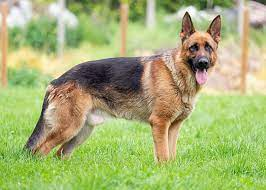

1/1 [==============================] - 0s 84ms/step
The image is a Dog


In [56]:
input_imgpath=input("Enter the path of the image:")
input_image=cv2.imread(input_imgpath)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(224,224))
input_image_scaled=input_image_resize/255
image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])
input_prediction=model.predict(image_reshaped)
inputpred_label=np.argmax(input_prediction)

if inputpred_label==0:
  print("The image is Cat")
elif inputpred_label==1:
  print("The image is a Dog")
